# Tarea 11.

In [104]:
import numpy as np
import sympy as sy
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

sy.init_printing()    #para que imprima bonito las integrales

In [105]:
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib as mpl
import seaborn as sb
import pandas as pd
import numpy as np


from matplotlib import animation, rc
#from IPython.display import HTML
#%matplotlib inline
#sb.set()

In [106]:
#tex PREAMBLE

#******************************************************

#rc('font',**{'family':'serif','serif':['Times']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


## 1. Leer tabla [r, xi, error]

In [107]:
data_lya_mp = np.loadtxt('dr14_lyalya_monopole.txt',dtype=float, skiprows=0)
data1= pd.DataFrame(data_lya_mp, columns=['r','xi','error_xi'])
data1.head()

#me resultó mejor usar np.loadtxt y luego convertir a dataframe pues pd.readcsv no detecta los espacios como 
#separados

,r,xi,error_xi
0,2.0,0.010298,0.000184
1,6.0,0.002726,0.000052
2,10.0,0.001441,0.000031
3,14.0,0.000831,0.000021
4,18.0,0.000514,0.000016


## 2. Calcular $r^2 \xi$

In [108]:
data1['r2xi']=(data1['r']**2)*data1['xi']
data1.head()

,r,xi,error_xi,r2xi
0,2.0,0.010298,0.000184,0.041191
1,6.0,0.002726,0.000052,0.098139
2,10.0,0.001441,0.000031,0.144063
3,14.0,0.000831,0.000021,0.162789
4,18.0,0.000514,0.000016,0.166543


Para propagar el error sabemos que si estamos multiplicando variables de la forma $$Q=\frac{a b ... c}{x y ... z}$$ 
y dichas variables tienen errores asociados no-correlacionados, entonces nuestro error estará dado por
$$\frac{\delta Q}{|Q|} = \left[\left(\frac{\delta a}{a} \right)^2+\left(\frac{\delta b}{b} \right)^2 + ... + (\left(\frac{\delta z}{z} \right)^2\right]^{1/2}$$

En este caso, únicamente $\xi$ tiene asociado error, por lo que la expresión anterior se reduce a $$\frac{\delta Q}{|Q|} = \frac{\delta\xi}{\xi}$$, por lo tanto tendremos $$\delta Q=Q\left(\frac{\delta\xi}{\xi}\right)$$ y finalmente nuestro resultado:

$$Q+\delta Q = r^2\xi + Q\left(\frac{\delta\xi}{\xi}\right) = r^2\xi \left(1 + \frac{\delta\xi}{\xi}\right)$$.


Fuente: http://ipl.physics.harvard.edu/wp-uploads/2013/03/PS3_Error_Propagation_sp13.pdf

In [109]:
data1['error_r2xi']=data1['r2xi']*(data1['error_xi']/data1['xi'])
data1.head()

,r,xi,error_xi,r2xi,error_r2xi
0,2.0,0.010298,0.000184,0.041191,0.000738
1,6.0,0.002726,0.000052,0.098139,0.001865
2,10.0,0.001441,0.000031,0.144063,0.003056
3,14.0,0.000831,0.000021,0.162789,0.004143
4,18.0,0.000514,0.000016,0.166543,0.005192


## 3. Graficar la nueva columna (con errores)

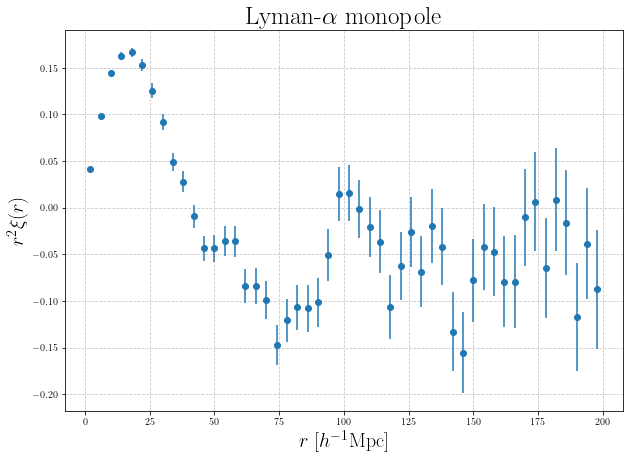

In [110]:
fig, ax = plt.subplots(figsize=(10,7))

#ax.plot(data1['r'],data1['r2xi'],'-',)
ax.errorbar(data1['r'],data1['r2xi'],data1['error_r2xi'],fmt='o')

#ax.legend()
ax.set_title(r'Lyman-$\alpha$ monopole', fontsize=25)
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

## 4. Leer matriz de covarianza

In [111]:
data_lya_cov = np.loadtxt('dr14_lyalya_monopole.cov',dtype=float, skiprows=0)
data_lya_cov
#podemos ver que la tabla es una de 3 columnas por 2500 filas, sólo necesitamos la última columna puesto que las
#primeras dos sólo nos dan los índices de la matriz, entonces usaremos sólo data_lya_cov[:,2]

array([[0.00000000e+00, 0.00000000e+00, 3.40098445e-08],
       [0.00000000e+00, 1.00000000e+00, 3.46819846e-09],
       [0.00000000e+00, 2.00000000e+00, 5.93667410e-10],
       ...,
       [4.90000000e+01, 4.70000000e+01, 3.33790752e-13],
       [4.90000000e+01, 4.80000000e+01, 1.16512973e-12],
       [4.90000000e+01, 4.90000000e+01, 2.64780398e-12]])

In [112]:
data2= pd.DataFrame(data_lya_cov[:,2],# columns=['r','xi','error_xi']
                   )
data2.head()

,0
0,3.400984e-08
1,3.468198e-09
2,5.936674e-10
3,2.174434e-10
4,1.203683e-10


In [113]:
#usemos mejor array para darle forma de matriz 50x50
data2=data_lya_cov[:,2]
data22=np.log(abs(data2))
covmatrix=data22.reshape(50,50)
covmatrix

array([[-17.19661581, -19.47963055, -21.24470187, ..., -27.73500651,
        -27.09565846, -27.91530077],
       [-19.47963055, -19.73641438, -20.94791141, ..., -28.48194637,
        -28.11229067, -28.08259999],
       [-21.24470187, -20.94791141, -20.79172942, ..., -28.95242456,
        -28.57390975, -28.34797461],
       ...,
       [-27.73500651, -28.48194637, -28.95242456, ..., -26.68052862,
        -27.51088824, -28.72826209],
       [-27.09565846, -28.11229067, -28.57390975, ..., -27.51088824,
        -26.72285114, -27.47818868],
       [-27.91530077, -28.08259999, -28.34797461, ..., -28.72826209,
        -27.47818868, -26.6572905 ]])

## 5. Graficar covmat

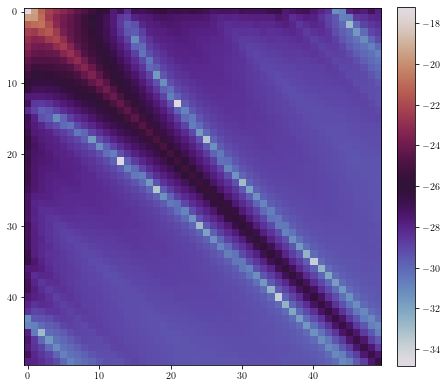

In [114]:
fig, ax = plt.subplots(figsize=(7,7))

c=ax.imshow(covmatrix, cmap='twilight')
fig.colorbar(c,fraction=0.046, pad=0.04)

<AxesSubplot:>

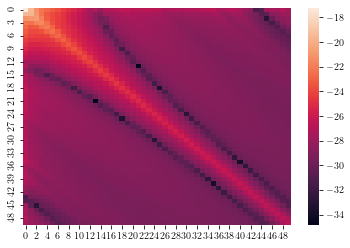

In [115]:
# y con seaborn
sb.heatmap(covmatrix)

## 6. Proponer una teoria para ajustar datos falsos

In [116]:
fake1 = pd.read_csv('new_dr14.csv')
#fake1 = fake1.set_index('r', drop=False)
fake1.head(3)

,r,r2error,r2xi
0,26.0,0.007621,0.194600
1,30.0,0.008811,0.105661
2,34.0,0.009856,0.076605


In [117]:
#In case you have a diagonal covariance matrix

s= fake1['r2error']**2
covariance = pd.DataFrame(np.diag(s),index=s.index,columns=s.index)

In [118]:
def model(r,sigma,mu,A):
    return -0.18+ 0.0004*r + 250*r**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

### a) Variando $\mu$

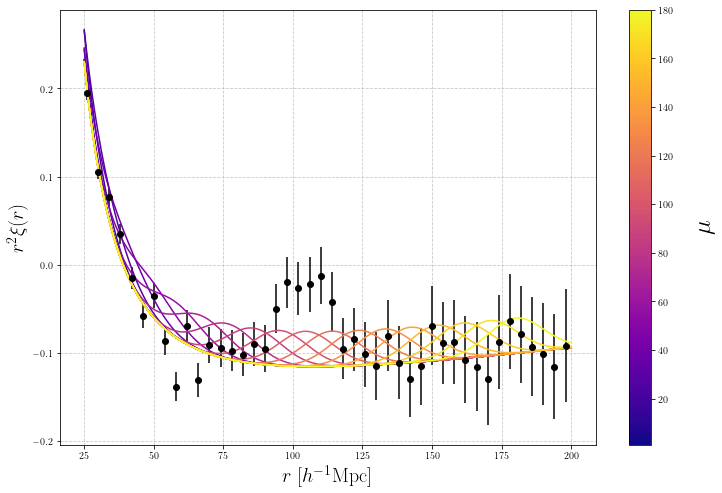

In [119]:
r     = np.linspace(25, 200, 200)
sigma = 10
mu    = np.linspace(1,180,20)
A     = 1


cmap='plasma'
norm1=mpl.colors.Normalize(vmin=min(mu), vmax=max(mu))
#normalizes the colormap to adjust to maxima and minima of set(blin)
mapper = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap)
#colormaps available at https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

fig, ax = plt.subplots(figsize=(12,8))

for i in mu:
    ax.plot(r,model(r,sigma,i,A), color=mapper.to_rgba(i))
ax.errorbar(fake1['r'],fake1['r2xi'],fake1['r2error'],fmt='o',color='black')

import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cmap)
m.set_array(mu)
cb1=plt.colorbar(m)
cb1.set_label(r'$\mu$',fontsize=25,rotation=90,labelpad=20)

#ax.legend()
#ax.set_title(r'FNT parameterisation')
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

#### Notamos que $\mu$ controla una oscilación en cierta r

### b) Variando $\sigma$

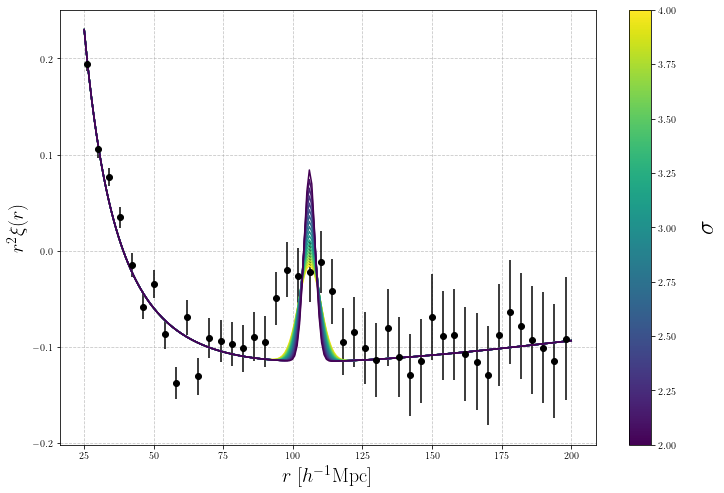

In [120]:
r     = np.linspace(25, 200, 200)
sigma = np.linspace(4,2,20)
mu    = 106
A     = 1


cmap='viridis'
norm1=mpl.colors.Normalize(vmin=min(sigma), vmax=max(sigma))
#normalizes the colormap to adjust to maxima and minima of set(blin)
mapper = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap)
#colormaps available at https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

fig, ax = plt.subplots(figsize=(12,8))

for i in sigma:
    ax.plot(r,model(r,i,mu,A), color=mapper.to_rgba(i))
ax.errorbar(fake1['r'],fake1['r2xi'],fake1['r2error'],fmt='o',color='black')

import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cmap)
m.set_array(sigma)
cb1=plt.colorbar(m)
cb1.set_label(r'$\sigma$',fontsize=25,rotation=90,labelpad=20)

#ax.legend()
#ax.set_title(r'FNT parameterisation')
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

#### Notamos que $\sigma$ controla la profundidad de dicha oscilación. Para valores pequeños obtenemos una distribución más picuda. Pero notemos que todas tienen una amplitud similar.

Variando $A$

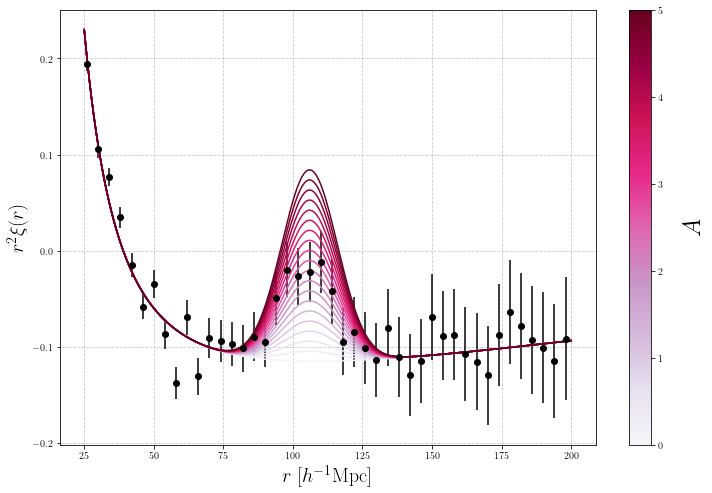

In [121]:
r     = np.linspace(25, 200, 200)
sigma = 10
mu    = 106
A     = np.linspace(0,5, 20)


cmap='PuRd'
norm1=mpl.colors.Normalize(vmin=min(A), vmax=max(A))
#normalizes the colormap to adjust to maxima and minima of set(blin)
mapper = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap)
#colormaps available at https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

fig, ax = plt.subplots(figsize=(12,8))

for i in A:
    ax.plot(r,model(r,sigma,mu,i), color=mapper.to_rgba(i))
ax.errorbar(fake1['r'],fake1['r2xi'],fake1['r2error'],fmt='o',color='black')

import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cmap)
m.set_array(A)
cb1=plt.colorbar(m)
cb1.set_label(r'$A$',fontsize=25,rotation=90,labelpad=20)

#ax.legend()
#ax.set_title(r'FNT parameterisation')
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

#### Notamos que $A$ controla la amplitud de la oscilación. 

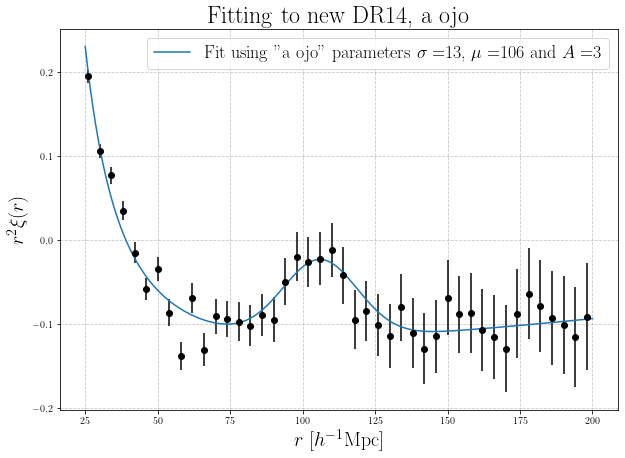

In [122]:
r     = np.linspace(25, 200, 200)
sigma = 13
mu    = 106
A     = 3

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(r,model(r,sigma,mu,A),label='Fit using "a ojo" parameters $\sigma=${0}, $\mu=${1} and $A=${2}'.format(sigma,mu,A))
ax.errorbar(fake1['r'],fake1['r2xi'],fake1['r2error'],fmt='o',color='black')

ax.legend(fontsize=18)
ax.set_title(r'Fitting to new DR14, a ojo',fontsize=24)
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

Los valores que mejor se ajustan son:

## $$\{\mu=106,\sigma=13,A=3\}$$

## 7. Construir likelihood con $\mu$

Sabemos que la $\chi^2$ se define, mediante la matriz de covarianza $C$ como: 

### $$\chi^2=(m-d)^T C^{-1} (m-d)$$

Donde $m$ son los valores teóricos de la observable ($i.e.$ $r_{BAO}$, $H_0$, $\omega_c$, etc) y $d$ los datos.

Basta con que calculemos el valor de $\xi$ usando nuestra expresión analítica ajustada, para los valores de $r$ que muestra la tabla, comparar el resultado con los valores reales y hacer el cálculo con la matriz de covarianza.

In [123]:
theo=[]
for i in fake1['r']:
    r2xitheo=model(i,sigma=13,mu=106,A=3)
    #print(i,r2xitheo)
    theo.append(r2xitheo)
    
theoretical=pd.DataFrame(theo,columns=['r2xitheo'])
#fake1.head(10)

In [124]:
theoretical.head()

,r2xitheo
0,0.200222
1,0.109778
2,0.049863
3,0.008330
4,-0.021476


In [125]:
fake1['r2xitheo']=theoretical['r2xitheo']
fake1.head()

,r,r2error,r2xi,r2xitheo
0,26.0,0.007621,0.194600,0.200222
1,30.0,0.008811,0.105661,0.109778
2,34.0,0.009856,0.076605,0.049863
3,38.0,0.011096,0.034590,0.008330
4,42.0,0.012328,-0.015153,-0.021476


In [126]:
delta=fake1['r2xitheo']-fake1['r2xi']
chi2=np.dot(np.transpose(delta),np.dot(np.linalg.inv(covariance),delta))
loglike=-chi2/2
loglike

Es el valor de la $log(\mathcal{L})$ usando el modelo con los parámetros

 $$\{\mu=106,\sigma=13,A=3\}$$.
 
 Hagamoslo para $\mu$ libre y veamos si disminuye

In [127]:
def modelmu(r,mu):
    A=3
    sigma=13
    return -0.18+ 0.0004*r + 250*r**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

def loglikemu(mu):
    delta=modelmu(fake1['r'],mu)-fake1['r2xi']
    chi2=np.dot(np.transpose(delta),np.dot(np.linalg.inv(covariance),delta))
    loglike=-chi2/2
    return loglike

## 8. Calcular loglike para diferentes valores de $\mu$ y graficar

Usemos las funciones que acabamos de definir sobre un linspace sobre los valores de $\mu$

In [128]:
mu_values = np.arange(1., 180., 5.)
probable  = [loglikemu([i]) for i in mu_values]
probable

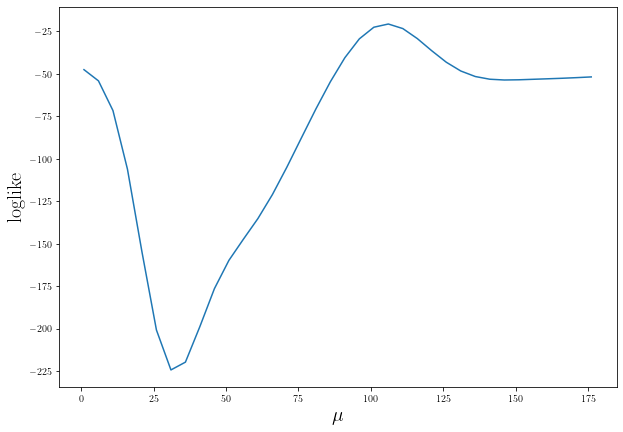

In [129]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(mu_values, probable)
plt.ylabel('loglike',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)
plt.show()

In [130]:
max(probable)

Como podemos ver, el valor maximo del loglikelihood es muy cercano al valor que obtuvimos "a ojo" (revisar arriba)

## 9. Calcular loglike para valores de $\mu$ y $\sigma$

Replicamos lo mismo pero ahora nuestra función es bi-variada

In [131]:
def modelmusigma(r,mu,sigma):
    A=3
    return -0.18+ 0.0004*r + 250*r**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

def loglikemusigma(mu,sigma):
    delta=modelmusigma(fake1['r'],mu,sigma)-fake1['r2xi']
    chi2=np.dot(np.transpose(delta),np.dot(np.linalg.inv(covariance),delta))
    loglike=-chi2/2
    return loglike

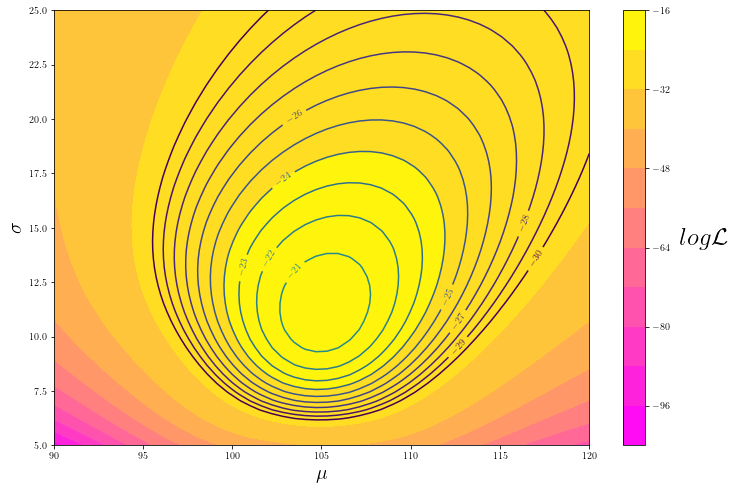

In [136]:
from matplotlib import ticker, cm

x = np.linspace(90, 120, 50)
y = np.linspace(5, 25, 50)

grid = [list(map(lambda p: loglikemusigma(p, sigma=i), x)) for i in y]

fig, ax = plt.subplots(figsize=(12,8))
gs = ax.contourf(x, y, grid, 10, cmap='spring')
cbar = fig.colorbar(gs)
cbar.set_label(r'$log\mathcal{L}$',fontsize=25,rotation=0,labelpad=35)

CS = ax.contour(x, y, grid, np.arange(-30., -10, 1))
ax.clabel(CS, inline=10, fontsize=10)

plt.ylabel('$\sigma$',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)
plt.show()

## 10. Resultado con datos originales

Ahora en vez de comparar con los datos fake, usemos los primeros datos y la matriz de covarianza asociada. Es decir 

#### data1 y covmatrix 

In [133]:
def modelmusigma2(r,mu,sigma):
    A=3
    return -0.18+ 0.0004*r + 250*r**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

def loglikemusigma2(mu,sigma):
    delta=modelmusigma2(data1['r'],mu,sigma)-data1['r2xi']
    chi2=np.dot(np.transpose(delta),np.dot(np.linalg.inv(covmatrix),delta))
    loglike=-chi2/2
    return loglike

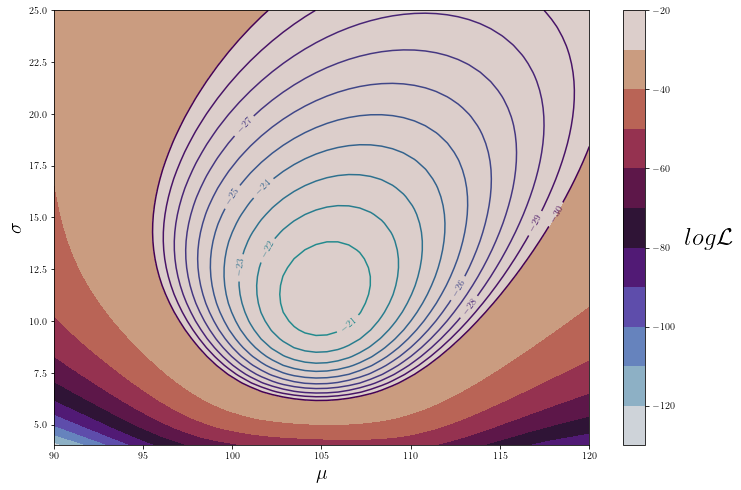

In [137]:
from matplotlib import ticker, cm

x = np.linspace(90, 120, 50)
y = np.linspace(4, 25, 50)

grid = [list(map(lambda p: loglikemusigma(p, sigma=i), x)) for i in y]

fig, ax = plt.subplots(figsize=(12,8))
gs = ax.contourf(x, y, grid, 10, cmap='twilight')
cbar = fig.colorbar(gs)
cbar.set_label(r'$log\mathcal{L}$',fontsize=25,rotation=0,labelpad=35)


CS = ax.contour(x, y, grid, np.arange(-30., -10, 1))
ax.clabel(CS, inline=10, fontsize=10)

plt.ylabel('$\sigma$',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)
plt.show()

Observamos que los parámetros que maximizan el likelihood son

$\mu\sim105$ y $\sigma\sim12$

# Parte 2.

## 1. ¿Que $w_0$ $w_a$ (CPL) explican mejor los cronometros cósmicos?

Cargamos los datos de cosmic clocks

In [9]:
data_cc = np.loadtxt('cosmic_clocks_2022_nomethod.csv',delimiter=',',dtype=float, skiprows=1)
data3= pd.DataFrame(data_cc, columns=['z','Hz','error_Hz'])
data3.head()

,z,Hz,error_Hz
0,0.0700,69.0,19.6
1,0.1000,69.0,12.0
2,0.1200,68.6,26.2
3,0.1700,83.0,8.0
4,0.1791,75.0,4.0


Construimos la matriz de covarianza a partir de los errores:

In [74]:
err= data3['error_Hz']**2
covcc = pd.DataFrame(np.diag(err),index=err.index,columns=err.index)

In [85]:
# Ecuación de Friedmann para w(z) de CPL (visto en tarea 9)
def Hz_CPL(z,w_0,w_a):

    # Usando datos de Planck 2018: 
    # Tabla 2: TT,TE,EE+lowE+lensing+BAO
    
    #OmR = 1e-4 
    #OmK = -0.01
    OmDE = 0.6889
    OmM = 0.3111
    H0 = 67.66               
    
    #Hz = H0*np.sqrt(OmR*(1+z)**4+OmM*(1+z)**3 + OmK*(1+z)**2 + OmDE*(1+z)**(3*(w_0+w_a+1)*np.exp(-3*w_a*z/1+z)))
    Hz = H0*np.sqrt(OmM*(1+z)**3 + OmDE*(1+z)**(3*(w_0+w_a+1)*np.exp(-3*w_a*z/1+z)))
    return Hz



def loglikecpl(w_0,w_a):
    delta=Hz_CPL(data3['z'],w_0,w_a)-data3['Hz']
    chi2=np.dot(np.transpose(delta),np.dot(np.linalg.inv(covcc),delta))
    loglike=-chi2/2
    return loglike

/tmp/ipykernel_26539/625256184.py:15: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(x, y, grid, np.arange(-1,-100, 30))


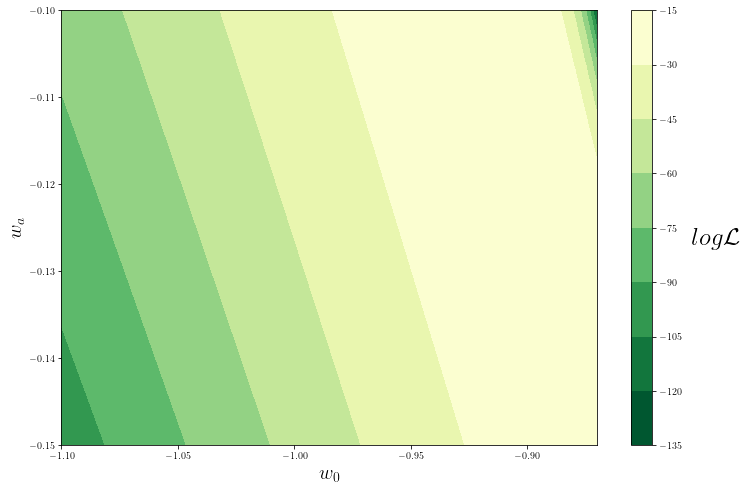

In [138]:
from matplotlib import ticker, cm

x = np.linspace(-0.87, -1.1, 100)
y = np.linspace(-0.1, -0.15, 100)

grid = [list(map(lambda p: loglikecpl(p, w_a=i), x)) for i in y]
#grid = [list(map(lambda p: loglikecpl(p, w_a=i), x)) for i in y]

fig, ax = plt.subplots(figsize=(12,8))
gs = ax.contourf(x, y, grid, 10, cmap='YlGn_r')
cbar = fig.colorbar(gs)
cbar.set_label(r'$log\mathcal{L}$',fontsize=25,rotation=0,labelpad=35)


CS = ax.contour(x, y, grid, np.arange(-1,-100, 30))
ax.clabel(CS, inline=10, fontsize=10)

plt.xlabel('$w_0$',  fontsize=20)
plt.ylabel('$w_a$',fontsize=20)
plt.show()

In [90]:
loglikecpl(-0.87,-0.1)

In [100]:
loglikecpl(-0.9,-0.11)

In [95]:
loglikecpl(-0.93,-0.12)

Notemos que no hay contornos cerrados y que la zona de best-fit (mejores valores) está acotada a un espacio relativamente "pequeño". El best-fit está alrededor de

### Best-fit $$\approx\{w_0=-0.9, w_a=-0.11\}_{cosmic clocks}$$